# **Image similarity techniques**

Image similarity techniques are nothing but finding nearest neighbors of every images using various distance metrics as shown below. there are 9 types of metrics can be used to find distance between two instances/vectors.

In this notebook, I have mentioned three of them:

1. Cosine distances
2. Euclidean distances
3. Manhattan distances

Image similarity techniques are used in recommender systems like image based product recommendation, Movie recommendation etc.

In [20]:
# image similarity and classification
from keras.datasets import fashion_mnist
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
(X_trg, y_trg), (X_tst, y_tst) = fashion_mnist.load_data()

print("Shape of the training dataset:", X_trg.shape)
print("Shape of the testing dataset:", X_tst.shape)
print("-------------------------------------------------")
print("Shape of the training target variable:", y_trg.shape)
print("Shape of the testing target variable:", y_tst.shape)
print("-------------------------------------------------")
# reshaping images to one-dimentional data
X_test = np.reshape(X_tst, (10000,784))
print("Shape of reshaped images: ", X_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of the training dataset: (60000, 28, 28)
Shape of the testing dataset: (10000, 28, 28)
-------------------------------------------------
Shape of the training target variable: (60000,)
Shape of the testing target variable: (10000,)
-------------------------------------------------
Shape of reshaped images:  (10000, 784)


## **1. Cosine similarity**


In [21]:
cos_similarity = cosine_similarity(X_test)
print("Shape of cosine similarity matrix is: ", cos_similarity.shape)
print("Details of cos_similarity:", cos_similarity)

Shape of cosine similarity matrix is:  (10000, 10000)
Details of cos_similarity: [[1.         0.53737176 0.29959086 ... 0.41691091 0.29104272 0.75233371]
 [0.53737176 1.         0.57679881 ... 0.51693626 0.5259895  0.60401192]
 [0.29959086 0.57679881 1.         ... 0.5212979  0.77687777 0.38123159]
 ...
 [0.41691091 0.51693626 0.5212979  ... 1.         0.46994367 0.38640914]
 [0.29104272 0.5259895  0.77687777 ... 0.46994367 1.         0.3511436 ]
 [0.75233371 0.60401192 0.38123159 ... 0.38640914 0.3511436  1.        ]]


In [22]:
# convert to pandas dataframe
cos_sim_df = pd.DataFrame(cos_similarity)
cos_sim_df.shape

(10000, 10000)

In [29]:
# find out the info of the product
pro_info = cos_sim_df.iloc[245].values
print("Product info index 245 in dataset:" ,pro_info)

Product info index 245 in dataset: [0.73391198 0.72703189 0.4878277  ... 0.46116883 0.46004688 0.76807936]


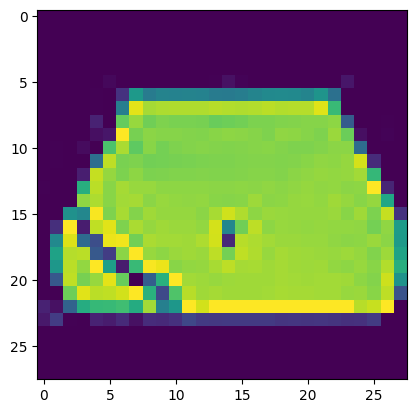

In [30]:
# show the image of index 245
plt.imshow(X_tst[245])

In [31]:
# finding similarity top 10 similar images to the index 245 using argsort method of numpy
index_images = np.argsort(-pro_info)[0:10]
print("index of similar images: ", index_images)

index of similar images:  [ 245 8361 3602 9229 9404 7240 1103 3213 8143 6497]


Text(0.5, 0.98, 'Similar images to the index 245')

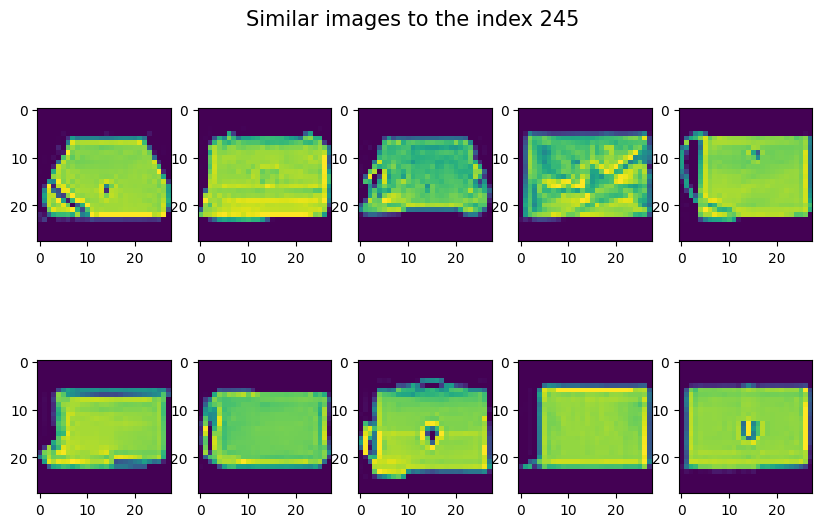

In [32]:
# print the similar image
fig, axs = plt.subplots(2,5, figsize=(10,6))
for idx, i in enumerate(index_images):
    axs[idx//5, idx%5].imshow(X_tst[i])

plt.suptitle("Similar images to the index 245", fontsize=15)

#**2. Euclidean distancet**

In [33]:
# using euclidean distance
euclid_sim  = euclidean_distances(X_test)
print("Shape of the matrix: ", euclid_sim.shape)
print("Euclid_sim similarity index: ", euclid_sim)

Shape of the matrix:  (10000, 10000)
Euclid_sim similarity index:  [[   0.         4052.72673641 3458.6190886  ... 2588.43968444
  3054.00180092 1495.7466363 ]
 [4052.72673641    0.         3962.1592598  ... 4101.74231273
  4085.4699852  4033.5728579 ]
 [3458.6190886  3962.1592598     0.         ... 2980.20469096
  2135.8874034  3139.0590947 ]
 ...
 [2588.43968444 4101.74231273 2980.20469096 ...    0.
  2753.35159397 2400.81985996]
 [3054.00180092 4085.4699852  2135.8874034  ... 2753.35159397
     0.         2701.79810497]
 [1495.7466363  4033.5728579  3139.0590947  ... 2400.81985996
  2701.79810497    0.        ]]


In [34]:
# converting them into pandas dataframe
euclid_df = pd.DataFrame(euclid_sim)
euclid_df.shape

(10000, 10000)

In [35]:
# sort the most similar images of an index 640
sim_images = euclid_df.iloc[640].sort_values(ascending=True)[:10]
sim_images

,640
640,0.000000
412,1185.489772
746,1200.242892
7761,1207.612107
1461,1213.964579
2502,1224.024918
8971,1231.260330
448,1233.948540
2651,1240.569224
944,1242.942477


In [36]:
# index of similar images
index_sim_images = sim_images.index
index_sim_images

Index([640, 412, 746, 7761, 1461, 2502, 8971, 448, 2651, 944], dtype='int64')

Text(0.5, 0.98, 'Similar images to the index 640')

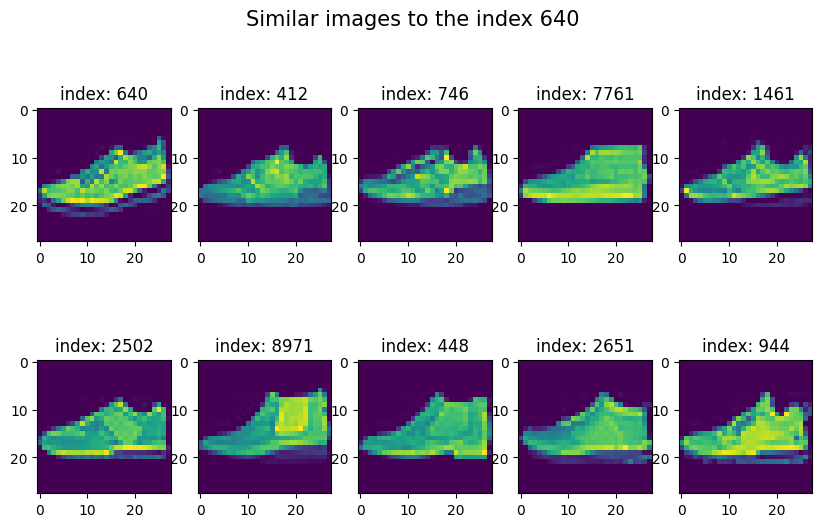

In [37]:
# print the similar image
fig, axs = plt.subplots(2,5, figsize=(10,6))
for idx, i in enumerate(index_sim_images):
    axs[idx//5, idx%5].imshow(X_tst[i])
    axs[idx//5, idx%5].set_title(f'index: {i}')

plt.suptitle("Similar images to the index 640", fontsize=15)

# **3. Manhattan distancest**

In [38]:
# using manhattan distances
manhattan = manhattan_distances(X_test)
print("Shape of distance matrix: ", manhattan.shape)
print("Manhattan distance matrixL", manhattan)

Shape of distance matrix:  (10000, 10000)
Manhattan distance matrixL [[    0. 83718. 64230. ... 43202. 55089. 22634.]
 [83718.     0. 74808. ... 82314. 79825. 84176.]
 [64230. 74808.     0. ... 47900. 27379. 57220.]
 ...
 [43202. 82314. 47900. ...     0. 43089. 41798.]
 [55089. 79825. 27379. ... 43089.     0. 48281.]
 [22634. 84176. 57220. ... 41798. 48281.     0.]]


In [39]:
# converting them into pandas dataframe
manhattan_df = pd.DataFrame(manhattan)
manhattan_df.shape

(10000, 10000)

In [40]:
# find the most similar image of index 1000
manhattan_sim_df = manhattan_df.iloc[1000].sort_values(ascending=True)[:10]
manhattan_sim_df

,1000
1000,0.0
1450,21279.0
5633,23283.0
5518,23605.0
5186,24098.0
9607,24555.0
4413,24578.0
1249,24741.0
4206,24819.0
4220,25209.0


In [41]:
# take the index of similar image of index 1000
mh_index = manhattan_sim_df.index
mh_index

Index([1000, 1450, 5633, 5518, 5186, 9607, 4413, 1249, 4206, 4220], dtype='int64')

Text(0.5, 0.98, 'Similar images to the index 1000')

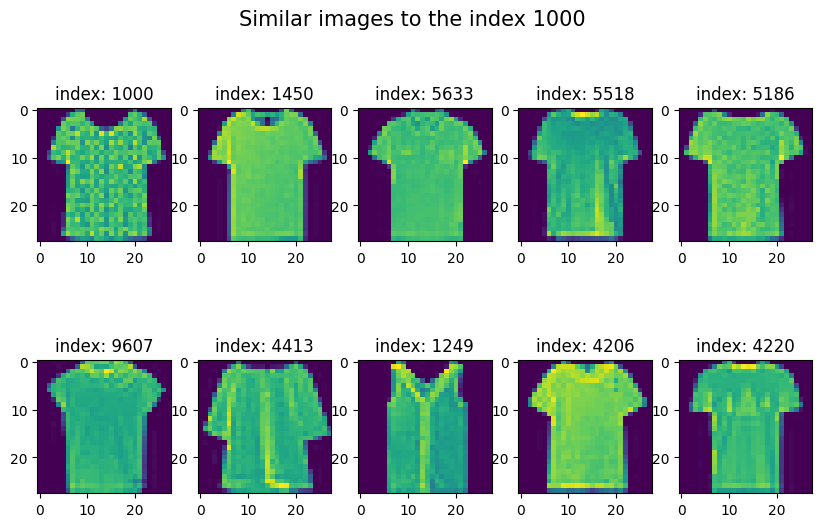

In [42]:
# print the similar image
fig, axs = plt.subplots(2,5, figsize=(10,6))
for idx, i in enumerate(mh_index):
    axs[idx//5, idx%5].imshow(X_tst[i])
    axs[idx//5, idx%5].set_title(f'index: {i}')

plt.suptitle("Similar images to the index 1000", fontsize=15)

**Note:**

Given the size of image dataset and huge numeber of parameters, Cosine similarity is one of most useful to find similar images out of given dataset.